In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from google.colab import drive
import requests
import io
drive.mount('/content/drive')
file_id = "1MjtsQdXE8bMkyFHqDpbcJyphJGjYPurT"
url = f"https://drive.google.com/uc?id={file_id}"
response = requests.get(url).content
df = pd.read_csv(io.StringIO(response.decode("utf-8")))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.head()
df= df.rename(columns={'Close(t)':'Close'})
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name,Date
248,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TESLA,2022-09-23
249,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TESLA,2022-09-26
250,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TESLA,2022-09-27
251,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TESLA,2022-09-28
252,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,TESLA,2022-09-29


In [10]:
file_id = "10jVWKGe9VUzJ8cr3iREKWZzgm-CP9BJy"
url = f"https://drive.google.com/uc?id={file_id}"
response = requests.get(url).content
tweet_sent_df = pd.read_csv(io.StringIO(response.decode("utf-8")))

In [14]:
from datetime import datetime


tweet_sent_df["Date"] = tweet_sent_df["Date"].isin(df['Date'])
tweet_sent_df = tweet_sent_df.drop(columns=["Date","Stock Name"])

df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Adj Close'] = df['Adj Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df['Open'] = df['Open'].astype(float)
df["positive"] = tweet_sent_df["positive"]
df["negative"] = tweet_sent_df["negative"]
df["compound"] = tweet_sent_df["compound"]

In [15]:
X = df[["Open", "High", "Low", "Adj Close", "positive", "negative", "compound"]]
y = df["Close"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [18]:
y_pred = model.predict(X_test)


In [22]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MAE:", mae)
print("R2 score:", r2)
print('MAPE:', mape)


MAE: 2.096799364276961
R2 score: 0.9934012470516974
MAPE: 0.6704561991218039


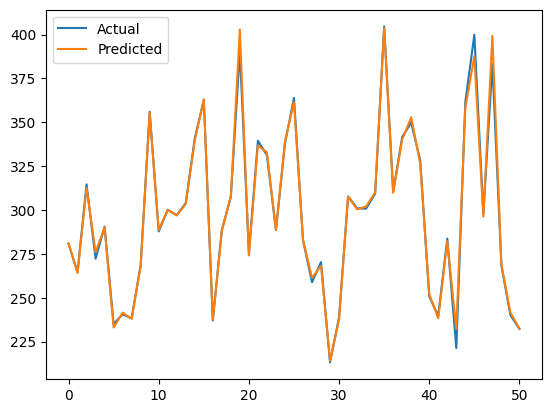

In [21]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


<ipython-input-27-88c13a73cc1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


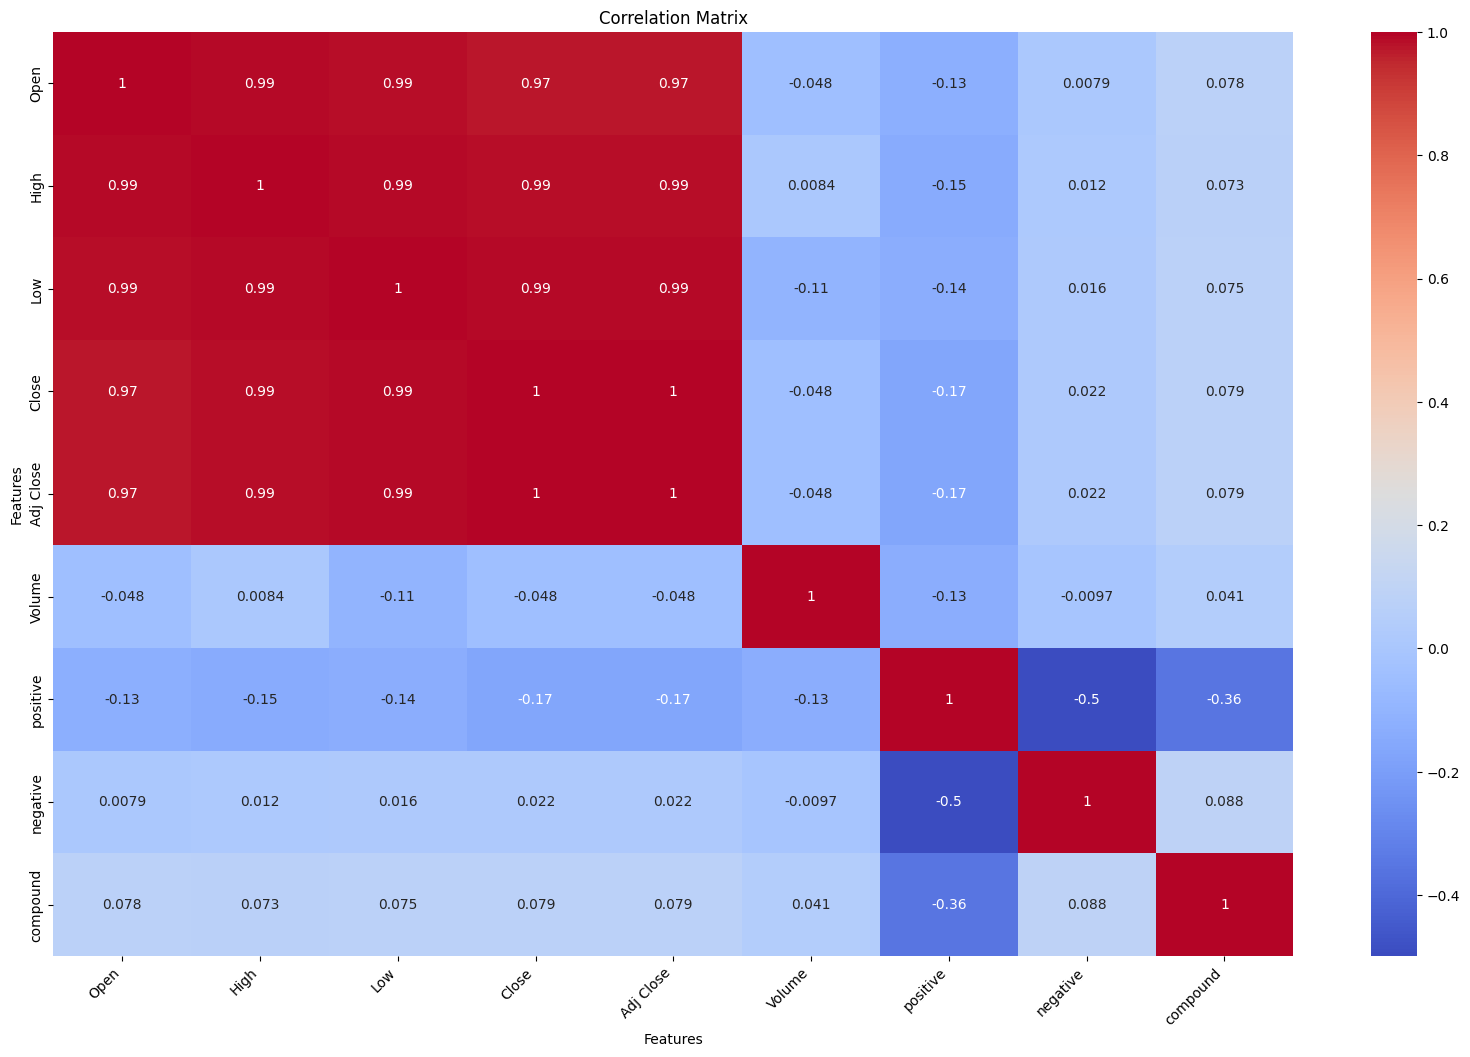

In [27]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(20, 12))

# Plot the correlation matrix as a heatmap, rotating the x-axis labels by 45 degrees
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a title and axis labels
ax.set_title('Correlation Matrix')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

# Show the plot
plt.show()